<div class="text-primary font-bold "><h3> <b>Table Of Contains</b></h3></div>

--- 

> ### Steps are:


1. [Gathering Data](#1)
- [Exploratory Data Analysis](#2)
- [Data Visualizations](#3)
- [Model Implementation.(#4)
- [ML Model Selecting and Model PredPrediction(#5)
- [HyperTunning the ML Model(#6)
- [Deploy Model(#7)




## Data Description 
 
* `Rooms`: Number of rooms

* `Price`: Price in dollars

* `Method`: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

* `Type`: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

* `SellerG`: Real Estate Agent

* `Date`: Date sold

* `Distance`: Distance from CBD

* `Regionname`: General Region (West, North West, North, North east …etc)

* `Propertycount`: Number of properties that exist in the suburb.

* `Bedroom2` : Scraped # of Bedrooms (from different source)

* `Bathroom`: Number of Bathrooms

* `Car`: Number of carspots

* `Landsize`: Land Size

* `BuildingArea`: Building Size

* `CouncilArea`: Governing council for the area


In [1]:
# linear algebra and calculus
import numpy as np 

# data manupulation and processing library, (e.g. pd.read_csv)
import pandas as pd 

from matplotlib import pyplot as plt

import seaborn as sns

from plotly import express as p

# 1. Gathering Data


- Reading the housing information data using read_csv to represent in tabular format 

In [2]:
data = pd.read_csv('updated.csv')



- Let's check the shape of our datasets `( number of rows, number of columns/features )`

In [3]:
data.shape

(58, 21)

# 2. Exploratory Data Analysis



- Let's check the first five rows from data

In [4]:
data.head()

,suburb,density,type_of_property,price,rooms,bedroom,toilets,ensuite,toilets_type,local_authority,...,garage,swimming_pool,fixtures_fittings,cottage,power,power_backup,water,water_backup,gated_community,garden_area
0,Borrowdale Brooke,Low,House,3000,8,3,3,1,Self,Harare Municipality,...,0,0,1,0,1,0,1,0,1,1
1,Borrowdale,Low,House,1800,7,4,3,2,Self,Harare Municipality,...,2,1,1,0,1,1,1,1,0,1
2,Borrowdale,Low,House,2500,7,2,2,1,Self,Harare Municipality,...,0,1,1,0,1,1,1,0,0,1
3,Borrowdale Brooke,Low,House,3000,7,4,2,1,Self,Harare Municipality,...,0,1,1,1,1,1,1,1,1,1
4,Borrowdale,Low,House,1700,6,4,2,1,Self,Harare Municipality,...,0,0,1,3,1,0,1,0,1,1


- Let's check the last five rows from data

In [5]:
data.tail()

,suburb,density,type_of_property,price,rooms,bedroom,toilets,ensuite,toilets_type,local_authority,...,garage,swimming_pool,fixtures_fittings,cottage,power,power_backup,water,water_backup,gated_community,garden_area
53,Zengeza 4,High,Cluster,40,1,1,1,0,Shared,Chitungwiza Municipality,...,0,0,0,0,1,0,1,1,0,0
54,Zengeza 4,High,Cluster,60,1,1,1,0,Shared,Chitungwiza Municipality,...,0,0,0,0,1,0,1,1,0,1
55,Zengeza 4,High,Cluster,120,2,1,1,1,Shared,Chitungwiza Municipality,...,0,0,0,0,1,0,1,1,0,0
56,Unit F,High,House,200,4,2,1,0,Self,Chitungwiza Municipality,...,0,0,0,0,1,0,1,1,0,1
57,Bluff Hill,Low,Cottage,900,6,3,1,1,Self,Harare Municipality,...,0,0,0,0,1,0,1,0,0,1


- Let's check the random ten number of data samples, Every time it will print the random five sample of records from original datasets. So we can easly understand the behaviour and what types of data type stored in particular features.

In [6]:
data.sample(10)

,suburb,density,type_of_property,price,rooms,bedroom,toilets,ensuite,toilets_type,local_authority,...,garage,swimming_pool,fixtures_fittings,cottage,power,power_backup,water,water_backup,gated_community,garden_area
48,Bloomingdale,Medium,House,1000,6,4,2,1,Self,Harare Municipality,...,1,0,1,0,1,1,1,1,0,1
22,Borrowdale Brooke,Low,House,2300,7,4,3,2,Self,Harare Municipality,...,1,0,1,1,1,0,1,1,0,1
45,Avondale,Medium,Cluster,1800,6,3,2,1,Shared,Harare Municipality,...,2,0,1,0,1,1,1,1,0,1
36,Avenues,Medium,Flat,1000,5,3,2,1,Self,Harare Municipality,...,1,0,1,0,1,0,1,1,0,0
38,Avenues,Medium,Flat,2200,7,3,3,2,Self,Harare Municipality,...,0,0,1,0,1,0,1,1,0,0
23,Borrowdale Brooke,Low,House,4000,8,6,7,6,Self,Harare Municipality,...,0,0,1,3,1,1,1,1,1,1
37,Avenues,Medium,Flat,1200,4,2,1,0,Self,Harare Municipality,...,0,0,1,0,1,0,1,1,0,0
39,Avondale,Medium,Flat,3000,12,5,4,1,Self,Harare Municipality,...,2,1,1,3,1,1,1,1,0,1
41,Avondale,Medium,House,1500,5,2,1,0,Self,Harare Municipality,...,0,0,0,0,1,1,1,1,0,0
0,Borrowdale Brooke,Low,House,3000,8,3,3,1,Self,Harare Municipality,...,0,0,1,0,1,0,1,0,1,1


### Target Feature

In [7]:

TARGET_FEATURE = 'price'

Y = data[TARGET_FEATURE]

Y.head()

0    3000
1    1800
2    2500
3    3000
4    1700
Name: price, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   suburb             58 non-null     object
 1   density            58 non-null     object
 2   type_of_property   58 non-null     object
 3   price              58 non-null     int64 
 4   rooms              58 non-null     int64 
 5   bedroom            58 non-null     int64 
 6   toilets            58 non-null     int64 
 7   ensuite            58 non-null     int64 
 8   toilets_type       58 non-null     object
 9   local_authority    58 non-null     object
 10  ward               58 non-null     int64 
 11  garage             58 non-null     int64 
 12  swimming_pool      58 non-null     int64 
 13  fixtures_fittings  58 non-null     int64 
 14  cottage            58 non-null     int64 
 15  power              58 non-null     int64 
 16  power_backup       58 non-null     int64 
 17 

As we can see in the output.

1. There are **13580 entries**
1. There are total **21 features (0 to 20)**
1. There are three types of datatype dtypes: **float64(12), int64(1), object(8)**
1. It's Memory usage that is, memory usage: **2.2+ MB**
1. Also, We can check how many missing values available in the **Non-Null Count** column

In [9]:
data.describe()

,price,rooms,bedroom,toilets,ensuite,ward,garage,swimming_pool,fixtures_fittings,cottage,power,power_backup,water,water_backup,gated_community,garden_area
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1799.482759,6.224138,3.327586,2.293103,1.189655,21.051724,0.655172,0.241379,0.741379,0.568966,0.982759,0.396552,0.982759,0.689655,0.155172,0.775862
std,1372.314503,2.127869,1.160580,1.184825,1.083479,12.252350,0.869598,0.431657,0.441701,0.957190,0.131306,0.493454,0.131306,0.466675,0.365231,0.420655
min,40.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,5.000000,2.000000,1.250000,1.000000,16.250000,0.000000,0.000000,0.250000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,1400.000000,7.000000,3.500000,2.000000,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,2650.000000,7.000000,4.000000,3.000000,2.000000,21.250000,1.750000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,8000.000000,12.000000,6.000000,7.000000,6.000000,41.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here,`describe()` method provides us the complete calculations details about the dataset. i.e. let's take the `price` feature for example. It shows the what's the `min`, `max`, `mean(average)` and `std(standard deviation)` of price feature.

In [10]:
data.price.describe([.2, .4, .6, .8])

count      58.000000
mean     1799.482759
std      1372.314503
min        40.000000
20%       650.000000
40%      1200.000000
50%      1400.000000
60%      1840.000000
80%      3000.000000
max      8000.000000
Name: price, dtype: float64

### Categorical Features

In [11]:
numeric_features = data.select_dtypes(['int', 'float']).columns

numeric_features , len(numeric_features)

(Index(['price', 'rooms', 'bedroom', 'toilets', 'ensuite', 'ward', 'garage',
        'swimming_pool', 'fixtures_fittings', 'cottage', 'power',
        'power_backup', 'water', 'water_backup', 'gated_community',
        'garden_area'],
       dtype='object'),
 16)

### Numerical Features

In [12]:
categorical_features = data.select_dtypes('object').columns

categorical_features, len(categorical_features)

(Index(['suburb', 'density', 'type_of_property', 'toilets_type',
        'local_authority '],
       dtype='object'),
 5)

In [13]:
print("Number of `Numerical` Features are:", len(numeric_features) )
print("Number of `Categorical` Features are:", len(categorical_features) )

Number of `Numerical` Features are: 16
Number of `Categorical` Features are: 5


### Find the Missing Values

Here, We need to find how many missing values are there in our datasets.

In [14]:
data.isna().sum().sort_values(ascending=False)

suburb               0
garage               0
gated_community      0
water_backup         0
water                0
power_backup         0
power                0
cottage              0
fixtures_fittings    0
swimming_pool        0
ward                 0
density              0
local_authority      0
toilets_type         0
ensuite              0
toilets              0
bedroom              0
rooms                0
price                0
type_of_property     0
garden_area          0
dtype: int64

Here, We convert the number of missing values into percentages. So, we can easly understand to how many percentage of missing values available.

In [15]:
(data.isna().sum() * 100 / data.isna().count()).sort_values(ascending=False)

suburb               0.0
garage               0.0
gated_community      0.0
water_backup         0.0
water                0.0
power_backup         0.0
power                0.0
cottage              0.0
fixtures_fittings    0.0
swimming_pool        0.0
ward                 0.0
density              0.0
local_authority      0.0
toilets_type         0.0
ensuite              0.0
toilets              0.0
bedroom              0.0
rooms                0.0
price                0.0
type_of_property     0.0
garden_area          0.0
dtype: float64

In [16]:
# Now, is there any missing values are there?
data.isna().any()

suburb               False
density              False
type_of_property     False
price                False
rooms                False
bedroom              False
toilets              False
ensuite              False
toilets_type         False
local_authority      False
ward                 False
garage               False
swimming_pool        False
fixtures_fittings    False
cottage              False
power                False
power_backup         False
water                False
water_backup         False
gated_community      False
garden_area          False
dtype: bool

#### Categorical Features

In [17]:
print("Total Records :", len(data) )

for col in categorical_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Records : 58
Total Unique Records of suburb = 20
Total Unique Records of density = 3
Total Unique Records of type_of_property = 5
Total Unique Records of toilets_type = 2
Total Unique Records of local_authority  = 3


###### Removing columns which has huge number of unique values

# 3. Data Visualizations


In [18]:
data.sample(4)


,suburb,density,type_of_property,price,rooms,bedroom,toilets,ensuite,toilets_type,local_authority,...,garage,swimming_pool,fixtures_fittings,cottage,power,power_backup,water,water_backup,gated_community,garden_area
55,Zengeza 4,High,Cluster,120,2,1,1,1,Shared,Chitungwiza Municipality,...,0,0,0,0,1,0,1,1,0,0
39,Avondale,Medium,Flat,3000,12,5,4,1,Self,Harare Municipality,...,2,1,1,3,1,1,1,1,0,1
41,Avondale,Medium,House,1500,5,2,1,0,Self,Harare Municipality,...,0,0,0,0,1,1,1,1,0,0
10,Borrowdale,Low,House,1800,7,4,4,2,Self,Harare Municipality,...,2,1,1,0,1,0,1,1,0,1


In [19]:
corr_ = data[numeric_features].corr()
corr_

,price,rooms,bedroom,toilets,ensuite,ward,garage,swimming_pool,fixtures_fittings,cottage,power,power_backup,water,water_backup,gated_community,garden_area
price,1.000000,0.659233,0.517387,0.659142,0.598285,-0.237466,0.145096,0.485924,0.485438,0.344810,0.150859,0.318970,0.150859,0.068230,0.386945,0.181838
rooms,0.659233,1.000000,0.822231,0.752855,0.529127,0.053381,0.421748,0.417573,0.529407,0.470329,0.139655,0.298158,0.139655,0.000609,0.247927,0.370708
bedroom,0.517387,0.822231,1.000000,0.771003,0.633363,0.059242,0.426789,0.329667,0.544622,0.524149,0.152836,0.259333,0.152836,0.093825,0.291862,0.404584
toilets,0.659142,0.752855,0.771003,1.000000,0.830580,-0.149710,0.372258,0.408087,0.415569,0.515557,0.145820,0.277825,0.145820,0.167398,0.379555,0.239725
ensuite,0.598285,0.529127,0.633363,0.830580,1.000000,-0.087975,0.256831,0.238005,0.324239,0.266287,0.146703,0.283444,0.146703,0.118448,0.412000,0.210382
ward,-0.237466,0.053381,0.059242,-0.149710,-0.087975,1.000000,0.215761,-0.145040,-0.042869,-0.084829,0.185947,0.092306,0.185947,-0.135215,-0.084155,0.335873
garage,0.145096,0.421748,0.426789,0.372258,0.256831,0.215761,1.000000,0.272368,0.357525,0.197688,0.100664,0.406027,0.100664,0.293670,-0.104762,0.216647
swimming_pool,0.485924,0.417573,0.329667,0.408087,0.238005,-0.145040,0.272368,1.000000,0.241142,0.086386,0.074714,0.366380,0.074714,0.204212,0.092094,0.206563
fixtures_fittings,0.485438,0.529407,0.544622,0.415569,0.324239,-0.042869,0.357525,0.241142,1.000000,0.188160,0.224260,0.317803,0.224260,0.114459,0.253125,0.249077
cottage,0.344810,0.470329,0.524149,0.515557,0.266287,-0.084829,0.197688,0.086386,0.188160,1.000000,0.079419,0.182514,0.079419,-0.029795,0.244860,0.147992


Text(0.5, 1.0, 'type_of_property')

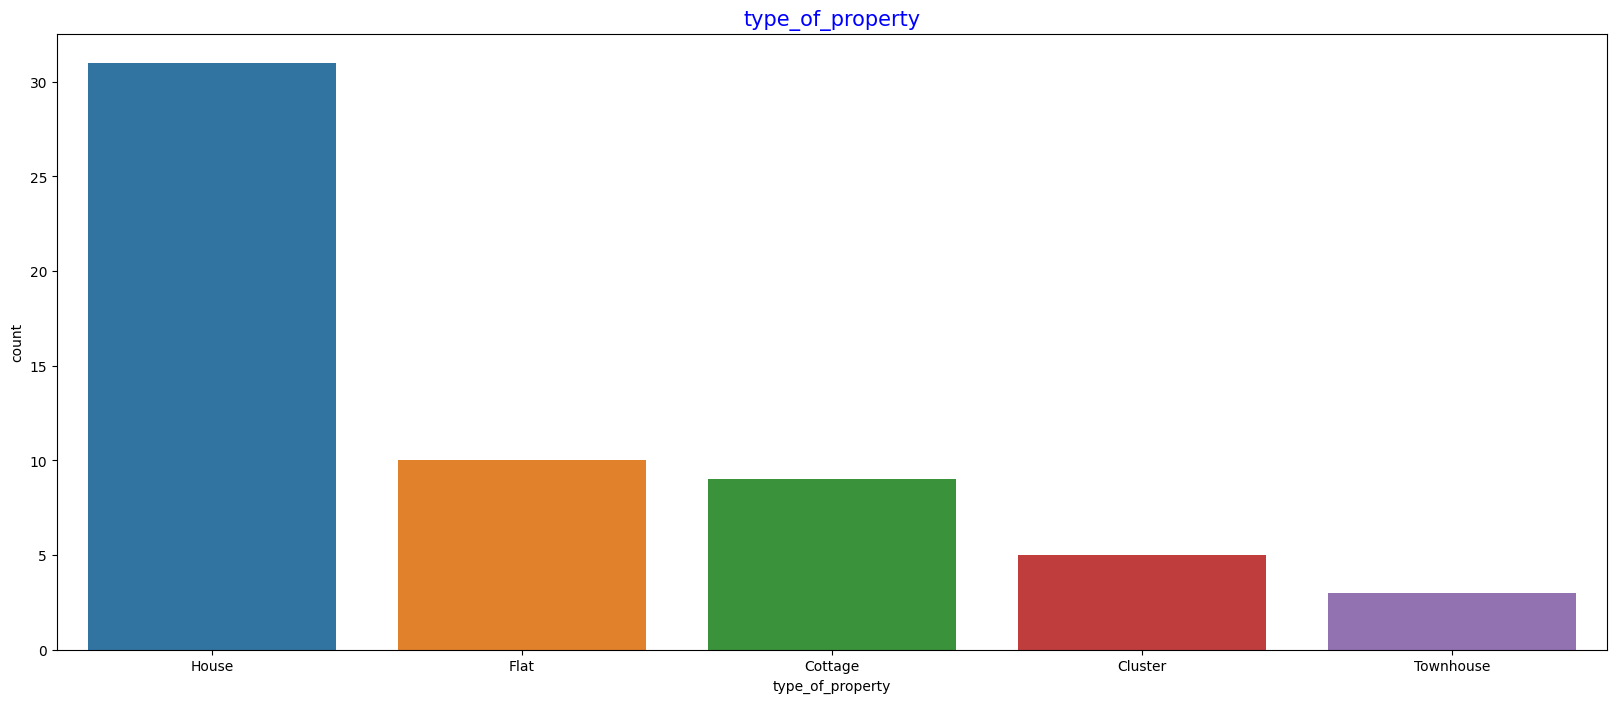

In [20]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='type_of_property', order=data['type_of_property'].value_counts().index)
plt.title("type_of_property", color='blue', fontsize=15)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'bedroom'}>,
        <Axes: title={'center': 'toilets'}>],
       [<Axes: title={'center': 'ensuite'}>,
        <Axes: title={'center': 'ward'}>,
        <Axes: title={'center': 'garage'}>,
        <Axes: title={'center': 'swimming_pool'}>],
       [<Axes: title={'center': 'fixtures_fittings'}>,
        <Axes: title={'center': 'cottage'}>,
        <Axes: title={'center': 'power'}>,
        <Axes: title={'center': 'power_backup'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'water_backup'}>,
        <Axes: title={'center': 'gated_community'}>,
        <Axes: title={'center': 'garden_area'}>]], dtype=object)

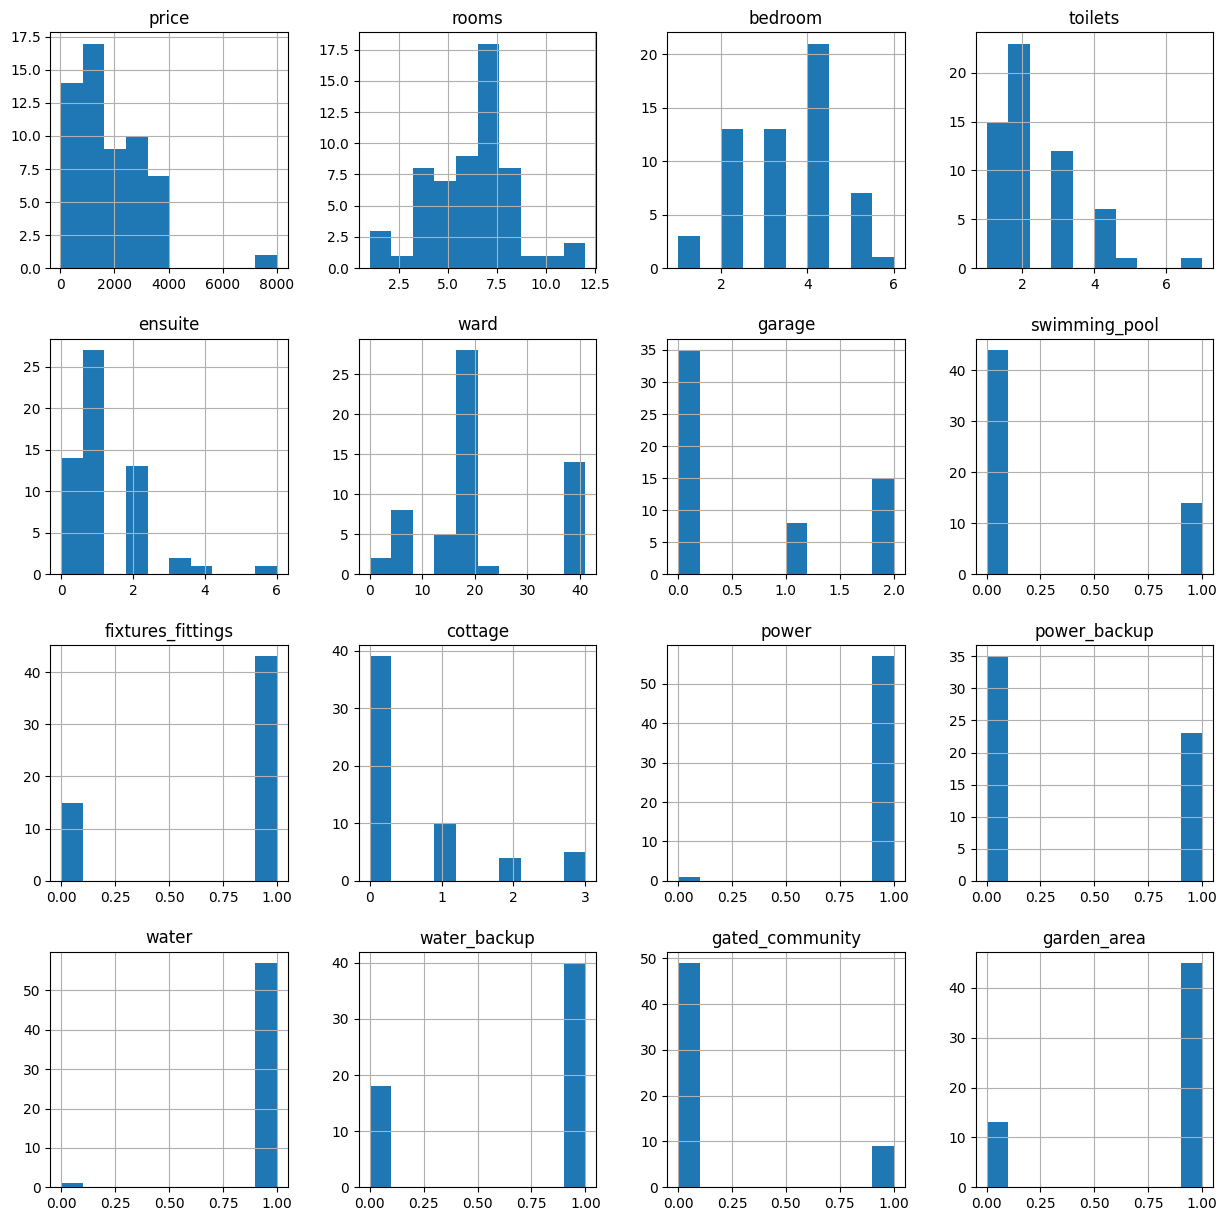

In [21]:
data.hist(figsize=(15,15))

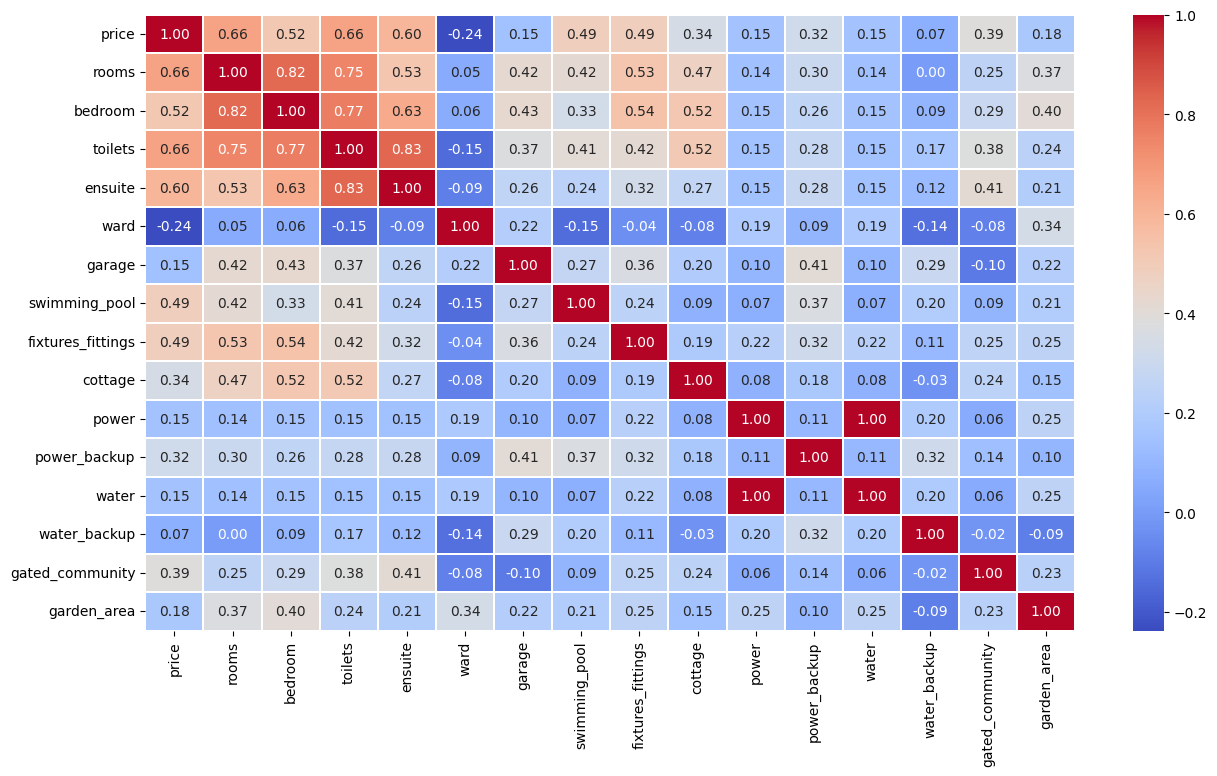

In [22]:
plt.figure(figsize=(15, 8))


sns.heatmap(corr_, fmt='.2f', linewidths=.1, annot=True, cmap='coolwarm')
plt.show()

## Feature Selection


- Here, We need to convert categorical values to numerical values

In [23]:
data[categorical_features].value_counts()

suburb               density  type_of_property  toilets_type  local_authority         
 Borrowdale          Low      House             Self          Harare Municipality         6
Bluff Hill           Low      Cottage           Self          Harare Municipality         5
 Borrowdale Brooke   Low      House             Self          Harare Municipality         5
Zengeza 4            High     Cluster           Shared        Chitungwiza Municipality    3
Westgate             Low      House             Self          Harare Municipality         3
 Borrowdale          Low      House             Self          Harare Municipality         3
Avondale             Medium   House             Self          Harare Municipality         3
Avenues              Medium   Flat              Self          Harare Municipality         3
Avondale             Medium   Flat              Self          Harare Municipality         2
                              Cluster           Shared        Harare Municipality    

- Implementing `LabelEncoder` to convert categorical values to numerical values.

In [24]:
# Encoding ...
from sklearn.preprocessing import LabelEncoder
LabelEncoding= LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col]= LabelEncoding.fit_transform(data[col])

In [25]:
correlation_mat = data.corr()

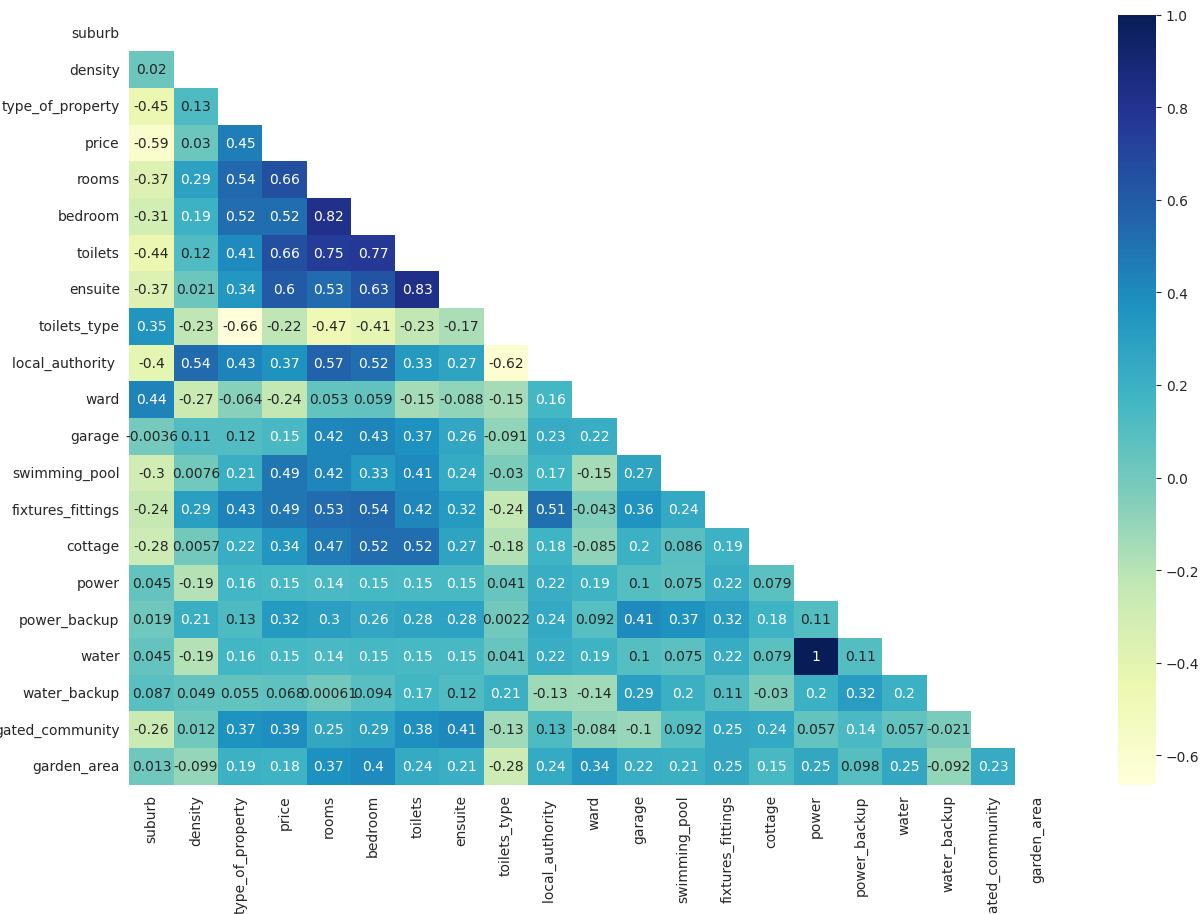

In [26]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    #f, ax = plt.subplots(figsize=(7,6))
    f, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

- Creating Training Feature to train the model to predict the beter accuracy.

In [27]:

# training_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
#                         'YearBuilt', 'Lattitude', 'Longtitude']

training_features = list(numeric_features) + list(categorical_features)

# Remove 'Price' Feature from list
training_features.remove('price')

# show the final list
training_features

['rooms',
 'bedroom',
 'toilets',
 'ensuite',
 'ward',
 'garage',
 'swimming_pool',
 'fixtures_fittings',
 'cottage',
 'power',
 'power_backup',
 'water',
 'water_backup',
 'gated_community',
 'garden_area',
 'suburb',
 'density',
 'type_of_property',
 'toilets_type',
 'local_authority ']

In [28]:
for col in training_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Unique Records of rooms = 11
Total Unique Records of bedroom = 6
Total Unique Records of toilets = 6
Total Unique Records of ensuite = 6
Total Unique Records of ward = 13
Total Unique Records of garage = 3
Total Unique Records of swimming_pool = 2
Total Unique Records of fixtures_fittings = 2
Total Unique Records of cottage = 4
Total Unique Records of power = 2
Total Unique Records of power_backup = 2
Total Unique Records of water = 2
Total Unique Records of water_backup = 2
Total Unique Records of gated_community = 2
Total Unique Records of garden_area = 2
Total Unique Records of suburb = 20
Total Unique Records of density = 3
Total Unique Records of type_of_property = 5
Total Unique Records of toilets_type = 2
Total Unique Records of local_authority  = 3


### Scalling Dataset

- Here, We are using `MinMaxScaler` to notmalize our dataset. Firstly, we need to import that class from `sklearn.preprocessing` package

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Let's Normalize the data for training and testing

minMaxNorm = MinMaxScaler()
minMaxNorm.fit(data[training_features])

MinMaxScaler()

Create `X` data and assignning from `training feature` columns from `data` and make it normalized.

In [31]:
X = minMaxNorm.transform(data[training_features]) 

In [32]:
X

array([[0.63636364, 0.4       , 0.33333333, ..., 0.75      , 0.        ,
        1.        ],
       [0.54545455, 0.6       , 0.33333333, ..., 0.75      , 0.        ,
        1.        ],
       [0.54545455, 0.2       , 0.16666667, ..., 0.75      , 0.        ,
        1.        ],
       ...,
       [0.09090909, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.27272727, 0.2       , 0.        , ..., 0.75      , 0.        ,
        0.        ],
       [0.45454545, 0.4       , 0.        , ..., 0.25      , 0.        ,
        1.        ]])

In [33]:
Y = data['price']  
Y

0     3000
1     1800
2     2500
3     3000
4     1700
5     2000
6     3500
7     1200
8     8000
9     2000
10    1800
11     600
12    3500
13    3000
14    2500
15    3000
16    3500
17    3500
18    1100
19    3500
20    2700
21    1300
22    2300
23    4000
24    3000
25    1000
26     250
27     900
28    1300
29    1200
30    1250
31     400
32    2500
33    1500
34     600
35     550
36    1000
37    1200
38    2200
39    3000
40    3500
41    1500
42    1200
43    2000
44     700
45    1800
46    1200
47    1200
48    1000
49     450
50     350
51     650
52     650
53      40
54      60
55     120
56     200
57     900
Name: price, dtype: int64

## Splite Train and Test Dataset

Before we splite the data, We need to import train_test_split module from sklearn package

In [34]:
from sklearn.model_selection import train_test_split

### Splites the main data

- split data into training and validation data, for both features and target. The split is based on a random number generator.
- Supplying a numeric value to the random_state argument guarantees we get the same split eve run this script.

In [35]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state = 0)

##### Check the train and test sized

In [36]:
print("Total size: ", data.shape[0])
print("Train size: ", train_X.shape, train_Y.shape)
print("Test size: ", test_X.shape, test_Y.shape)

Total size:  58
Train size:  (43, 20) (43,)
Test size:  (15, 20) (15,)


# Model Building

In [37]:
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_absolute_error

In [38]:
lr_model = LinearRegression()

lr_model.fit(train_X, train_Y)

LinearRegression()

In [39]:
lr_model_predicted = lr_model.predict(test_X)
lr_model_predicted

array([1060.75847102, 1939.30127152,  232.57912765, 1332.83280296,
        994.32143772, 4415.2823389 , 2259.02783651,  761.09897594,
       2544.06838491,  364.70277769, 2669.41433549, 2554.28949433,
       1077.12348141, 2941.55118684, 1022.99025965])

In [40]:
lr_model_score = lr_model.score(test_X, test_Y )

lr_model_score

-0.3027627812766458

Now, Let's find the `mean absolute error` using test_Y and predicted vales

In [41]:
mae = mean_absolute_error(test_Y, lr_model_predicted)

###### Store model and it's predictoin score in dataframe that we created below the model building section

In [42]:
print('model_name',lr_model.__class__.__name__)
print('prediction_score', lr_model_score*100,"%")
print('mean_absolute_error', mae)

model_name LinearRegression
prediction_score -30.27627812766458 %
mean_absolute_error 807.9500376121865


Now, let's see the model_summary dataframe

### Decision Tree Regressor Model

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
Dtree_model = DecisionTreeRegressor(random_state=1)

In [45]:
Dtree_model.fit(train_X, train_Y)

DecisionTreeRegressor(random_state=1)

In [46]:
Dtree_model_predicted = Dtree_model.predict(test_X)

In [47]:
Dtree_model_score = Dtree_model.score(test_X, test_Y)
Dtree_model_score

0.08893332892605699

In [48]:
mae = mean_absolute_error(Dtree_model_predicted, test_Y)

In [49]:
print('model_name',Dtree_model.__class__.__name__)
print('prediction_score', Dtree_model_score)
print('mean_absolute_error', mae)

model_name DecisionTreeRegressor
prediction_score 0.08893332892605699
mean_absolute_error 696.6666666666666


### Random Forest Regressor Model

Here, We implement other models from ensemble package.

In [50]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  BaggingRegressor 
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor

In [51]:
RFRModel = RandomForestRegressor(max_leaf_nodes=100, random_state=1)

In [52]:
RFRModel.fit(train_X, train_Y)

RandomForestRegressor(max_leaf_nodes=100, random_state=1)

In [53]:
RFRModel_predicted = RFRModel.predict(test_X)

In [54]:
RFRModel_score = RFRModel.score(test_X, test_Y)
RFRModel_score

0.30534699930585396

In [80]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7]}

rfr_model = RandomForestRegressor(random_state=35)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(train_X, train_Y)

# Best hyperparameters
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 3, 'n_estimators': 200}


In [56]:
mae = mean_absolute_error(RFRModel_predicted, test_Y)

In [57]:
print('model_name',RFRModel.__class__.__name__)
print('prediction_score', RFRModel_score)
print('mean_absolute_error', mae)
 

model_name RandomForestRegressor
prediction_score 0.30534699930585396
mean_absolute_error 567.66


In [58]:
# Creating Model
BGR_model = BaggingRegressor()

# Model Fitting
BGR_model.fit(train_X, train_Y)

# Model Prediction
BGR_model_predicted = BGR_model.predict(test_X)

# Model Score
BGR_model_score = BGR_model.score(test_X, test_Y)

# find Mean Absolute Error
mae = mean_absolute_error(test_Y, BGR_model_predicted)

In [59]:
print(test_X)

[[0.45454545 0.6        0.16666667 0.16666667 0.31707317 0.
  0.         1.         0.         1.         0.         1.
  1.         1.         1.         0.47368421 1.         0.75
  0.         1.        ]
 [0.45454545 0.4        0.16666667 0.16666667 1.         0.
  0.         1.         0.         1.         0.         1.
  0.         0.         1.         0.42105263 0.5        0.75
  0.         1.        ]
 [0.27272727 0.2        0.         0.         0.41463415 0.5
  0.         1.         0.         1.         0.         1.
  1.         0.         1.         0.57894737 1.         0.5
  0.         1.        ]
 [0.54545455 0.6        0.16666667 0.33333333 1.         1.
  0.         1.         0.         1.         0.         1.
  0.         0.         1.         0.94736842 0.5        0.5
  0.         1.        ]
 [0.27272727 0.2        0.         0.         0.17073171 0.
  0.         0.         0.         1.         0.         1.
  1.         0.         1.         0.05263158 0.5    

In [60]:
print('model_name',BGR_model.__class__.__name__)
print('prediction_score', BGR_model_score)
print('mean_absolute_error', mae)

model_name BaggingRegressor
prediction_score 0.12773361319538568
mean_absolute_error 599.6666666666666


### Ada Boost Regressor Model

In [61]:
    
# Creating Model
ADB_model = AdaBoostRegressor()

# Model Fitting
ADB_model.fit(train_X, train_Y)

# Model Prediction
ADB_model_predicted = ADB_model.predict(test_X)

# Model Score
ADB_model_score = ADB_model.score(test_X, test_Y)

# find Mean Absolute Error
mae = mean_absolute_error(test_Y, ADB_model_predicted)

In [62]:
print('model_name',ADB_model.__class__.__name__)
print('prediction_score', ADB_model_score)
print('mean_absolute_error', mae)

model_name AdaBoostRegressor
prediction_score 0.3090698602762507
mean_absolute_error 557.7958990613789


### Gradient Boosting Regressor Model

In [63]:
# Creating Model
GBR_model = GradientBoostingRegressor(n_estimators=150, random_state=1)

# Model Fitting
GBR_model.fit(train_X, train_Y)

# Model Prediction
GBR_model_predicted = GBR_model.predict(test_X)

# Model Score
GBR_model_score = GBR_model.score(test_X, test_Y)

# find Mean Absolute Error
mae = mean_absolute_error(test_Y, GBR_model_predicted)

In [64]:
print('model_name',GBR_model.__class__.__name__)
print('prediction_score', GBR_model_score)
print('mean_absolute_error', mae)

model_name GradientBoostingRegressor
prediction_score 0.20672778506118428
mean_absolute_error 607.4191322561584


In [65]:
# Random Forest Regressor Model
from xgboost import XGBRegressor

In [66]:
XGBR_model = XGBRegressor()

In [67]:
XGBR_model.fit(train_X, train_Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
XGBR_model_predicted = XGBR_model.predict(test_X)

In [69]:
XGBR_model_score = XGBR_model.score(test_X, test_Y)
XGBR_model_score

0.016489039139249373

In [70]:
mae = mean_absolute_error(test_Y, XGBR_model_predicted)
mae

670.5756225585938

In [71]:
print('model_name',XGBR_model.__class__.__name__)
print('prediction_score', XGBR_model_score)
print('mean_absolute_error', mae)
 

model_name XGBRegressor
prediction_score 0.016489039139249373
mean_absolute_error 670.5756225585938


Let's implement some hyper param tunning using `n_estimators=500, max_depth=10, learning_rate=0.05`.

In [72]:
XGBR_model_500 = XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05)
XGBR_model_500.fit(train_X, train_Y)

XGBR_model_500_predicted = XGBR_model_500.predict(test_X)

XGBR_model_500_score = XGBR_model_500.score(test_X, test_Y)
print(XGBR_model_500_score)

mae = mean_absolute_error(test_Y, XGBR_model_500_predicted)
print(mae)

0.27564346339223333
588.8530476888021


In [73]:
print('model_name: XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05')
print('prediction_score', XGBR_model_500_score)
print('mean_absolute_error', mae)

model_name: XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05
prediction_score 0.27564346339223333
mean_absolute_error 588.8530476888021


# HYPER PARAMS TUNNING 

- Using GridSearchCV.


In [74]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor

In [75]:
xgbr_model = XGBRegressor() # {'objective': 'reg:squarederror' }
params = {
    'n_estimators': [110, 120, 130, 140], 
    'learning_rate': [ 0.05, 0.075, 0.1],
    'max_depth': [ 7, 9],
    'reg_lambda': [0.3, 0.5]
}

xgb_reg = GridSearchCV(estimator=xgbr_model, param_grid=params, cv=5, n_jobs=-1)
xgb_reg.fit(train_X, train_Y)

xgbr_model_score = xgb_reg.best_score_
xgbr_model_pred = xgb_reg.predict(test_X)

mae = mean_absolute_error(test_Y, xgbr_model_pred)

print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
print("mean_absolute_error :", mae)

Best score: -0.115
Best parameters set: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 110, 'reg_lambda': 0.3}
mean_absolute_error : 576.3886515299479


In [76]:
print('model_name: XGBRegressor_HyperParamsTunning')
print('prediction_score', xgbr_model_score)
print('mean_absolute_error', mae)

model_name: XGBRegressor_HyperParamsTunning
prediction_score -0.11507746436026615
mean_absolute_error 576.3886515299479


In [77]:
rfr_model = RandomForestRegressor(random_state=35)

rfr_params_grid = {
    'n_estimators' : [600,750,800,850],
    'max_depth' : [7],
    'max_features': [5],
    'min_samples_leaf' : [3],
    'min_samples_split' : [4, 6 ,9]
}

gscv_rfr_cv = GridSearchCV(estimator=rfr_model, 
                                      param_grid=rfr_params_grid,
                                      cv = 5 ,
                                      n_jobs = -1,
                                      verbose = 5)

gscv_rfr_cv.fit(train_X, train_Y)

gscv_rfr_cv_score = gscv_rfr_cv.best_score_

gscv_rfr_cv_pred = gscv_rfr_cv.predict(test_X)

mae = mean_absolute_error(test_Y, gscv_rfr_cv_pred)

print("Best score: %0.3f" % gscv_rfr_cv.best_score_)
print("Best parameters set:", gscv_rfr_cv.best_params_)
print("mean_absolute_error :", mae)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best score: 0.483
Best parameters set: {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 850}
mean_absolute_error : 603.4515346809411


In [78]:
print('model_name: Random Forest Regressor Hyper Params Tunning')
print('prediction_score',gscv_rfr_cv_score)
print('mean_absolute_error', mae)

model_name: Random Forest Regressor Hyper Params Tunning
prediction_score 0.4825132755438603
mean_absolute_error 603.4515346809411
